# Social Security EDA

> **Notebook Author:** Elliott Serna

## Beneficiary-Worker Counts 

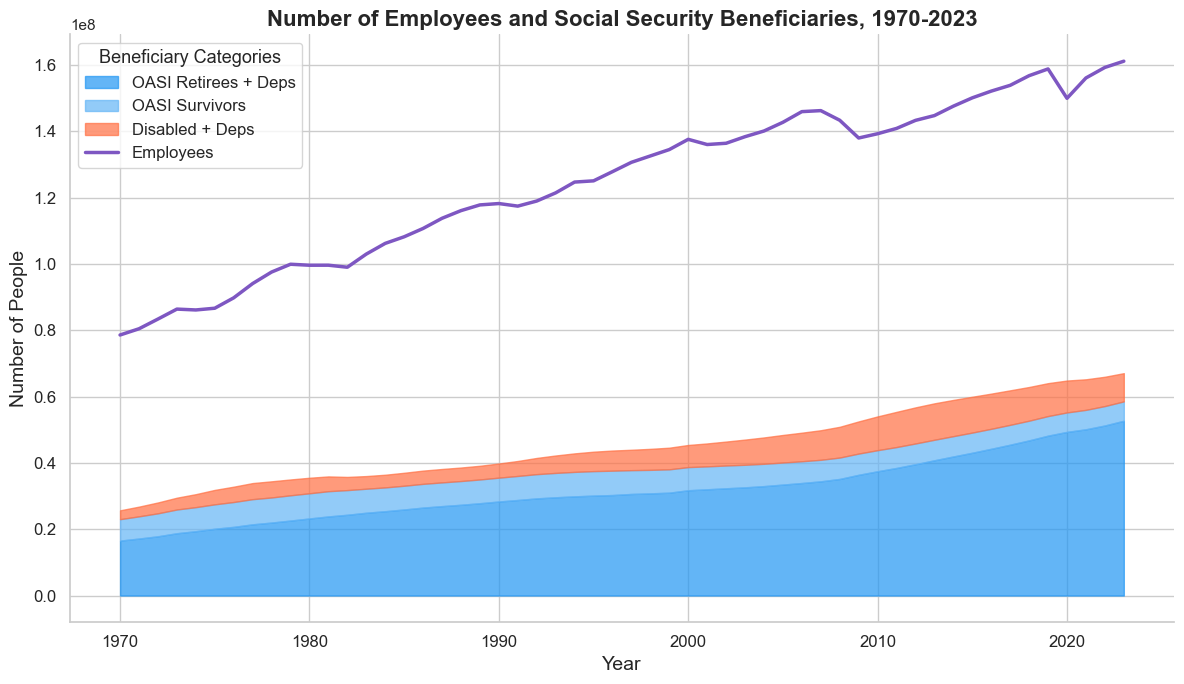

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/Users/elliottserna/Desktop/CDJ/Social_Security/workspace/Elliott/data/beneficiaries_workers.xlsx'
sheet_name = 'Analysis'

# Read the data into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rescale the 'EMPLOYEES' column (values are in thousands)
df['EMPLOYEES'] = df['EMPLOYEES'] * 1000

# Calculate cumulative sums for stacked areas
df['RETIREES_DEPS_CUM'] = df['OASI RETIREES + DEPS']
df['SURVIVORS_CUM'] = df['RETIREES_DEPS_CUM'] + df['OASI SURVIVORS']
df['DISABLED_DEPS_CUM'] = df['SURVIVORS_CUM'] + df['DISABLED + DEPS']

# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 7))

# Define colors for the categories
oasi_color = '#64b5f6'  # Light blue for OASI categories
oasi_dark_color = '#2196f3'  # Darker blue for OASI retirees
disability_color = '#ff7043'  # Coral for disabled category
employees_color = '#7e57c2'  # Purple for employees line

# Plot the stacked areas with cohesive colors
plt.fill_between(df['YEAR'], 0, df['RETIREES_DEPS_CUM'], label='OASI Retirees + Deps', color=oasi_dark_color, alpha=0.7)
plt.fill_between(df['YEAR'], df['RETIREES_DEPS_CUM'], df['SURVIVORS_CUM'], label='OASI Survivors', color=oasi_color, alpha=0.7)
plt.fill_between(df['YEAR'], df['SURVIVORS_CUM'], df['DISABLED_DEPS_CUM'], label='Disabled + Deps', color=disability_color, alpha=0.7)

# Overlay the line plot for employees
sns.lineplot(x='YEAR', y='EMPLOYEES', data=df, color=employees_color, label='Employees', linewidth=2.5)

# Add titles and labels with enhanced font sizes
plt.title('Number of Employees and Social Security Beneficiaries, 1970-2023', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend with better spacing
plt.legend(title='Beneficiary Categories', loc='upper left', fontsize=12, title_fontsize='13')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()


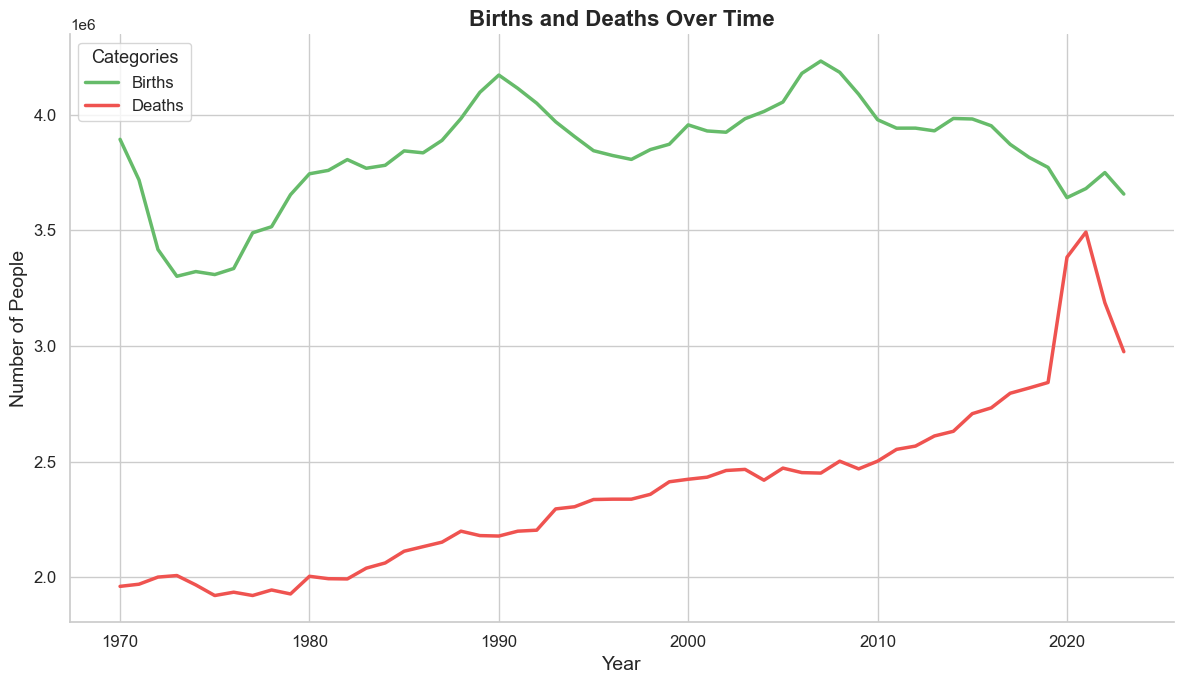

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data from the Excel file
file_path = '/Users/elliottserna/Desktop/CDJ/Social_Security/workspace/Elliott/data/births_deaths.xlsx'
sheet_name = 'Analysis'

# Read the data into a DataFrame
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Rescale the 'BIRTHS' and 'DEATHS' columns (values are in thousands)
df['BIRTHS'] = df['BIRTHS'] * 1000
df['DEATHS'] = df['DEATHS'] * 1000

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(12, 7))

# Define colors for births and deaths
births_color = '#66bb6a'  # Green for births
deaths_color = '#ef5350'   # Red for deaths

# Plotting the lines for births and deaths
sns.lineplot(x='YEAR', y='BIRTHS', data=df, color=births_color, label='Births', linewidth=2.5)
sns.lineplot(x='YEAR', y='DEATHS', data=df, color=deaths_color, label='Deaths', linewidth=2.5)

# Add titles and labels
plt.title('Births and Deaths Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add a legend
plt.legend(title='Categories', loc='upper left', fontsize=12, title_fontsize='13')

# Remove the top and right spines for a cleaner look
sns.despine()

# Show the plot
plt.tight_layout()
plt.show()
